In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [143]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [144]:
df = pd.read_csv('titanic.csv')

In [145]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [146]:
df['Embarked'] = df['Embarked'].fillna('S')

# Exaploratory Data Analysis

Created heatmap in order to check all the missing value in our dataset

<AxesSubplot:>

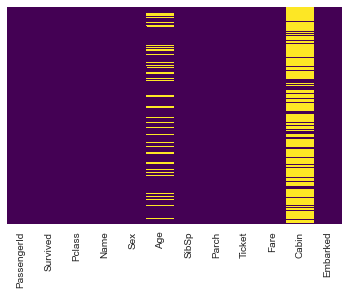

In [147]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. At the same time Cabin column consists of too much missing value.

C:\Users\Abhinav Bagwari\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


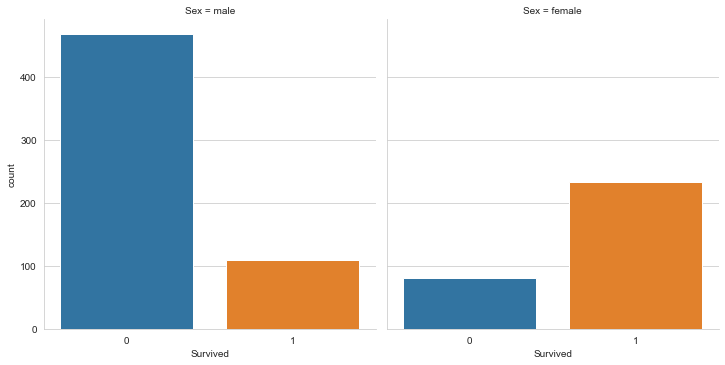

In [148]:
sns.factorplot(x="Survived",col='Sex',kind='count',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

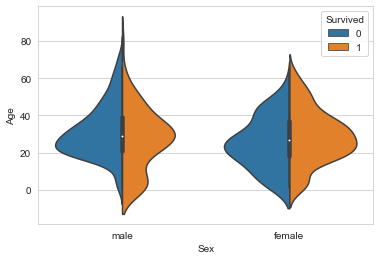

In [149]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=df,split=True)

 this means that most of the males and females were between 20–40 years old of age.

<AxesSubplot:xlabel='Survived', ylabel='count'>

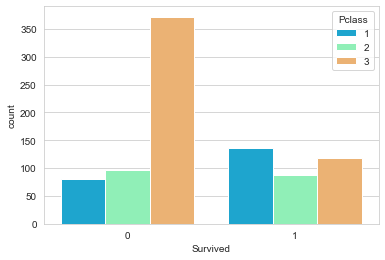

In [150]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

C:\Users\Abhinav Bagwari\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


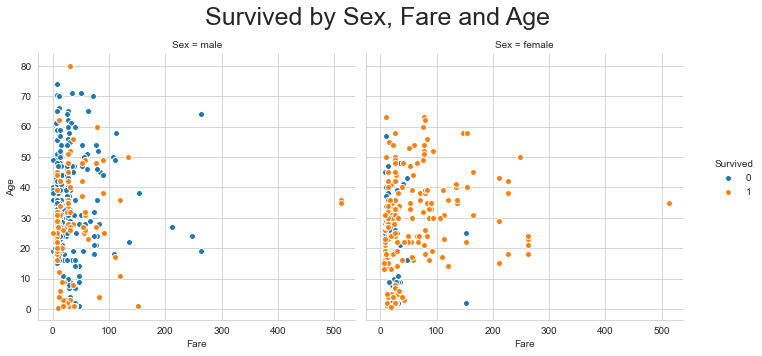

In [151]:
g = sns.FacetGrid(df, size=5,hue="Survived", col ="Sex", margin_titles=True)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top=0.85)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

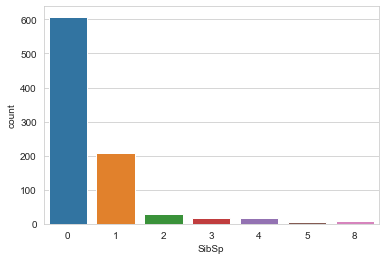

In [152]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot:>

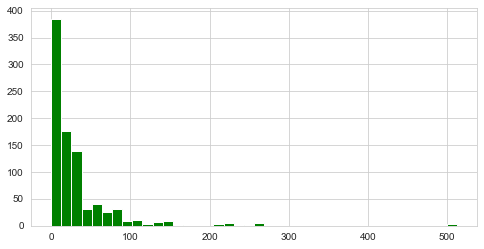

In [153]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

Fare

# Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers or check the average age by passenger class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

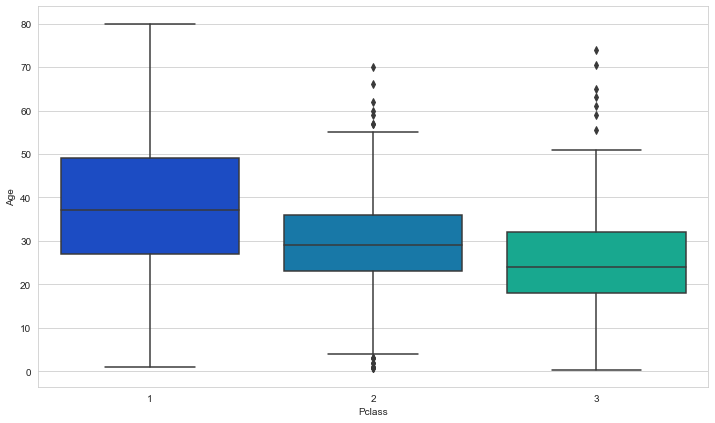

In [154]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [155]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [156]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)
df.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

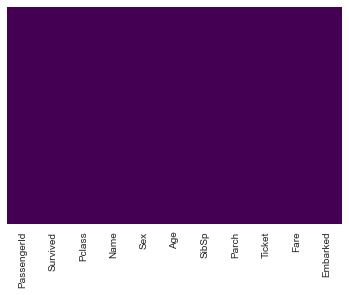

In [157]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Finally our data looks much better as we are now able to handle almost all the missing value.

# Statistical Test

In [158]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.066409,13.244532,0.42,22.0000,26.0000,37.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Overview:
only 38% passenger survived during that tragedy.
~74% female passenger survived, while only ~19% male passenger survived.
~63% first class passengers survived, while only 24% lower class passenger survived.

In [159]:
pd.DataFrame(abs(df.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.047255
SibSp,0.035322
PassengerId,0.005007


Sex is the most important correlated feature with Survived(dependent variable) feature followed by Pclass.

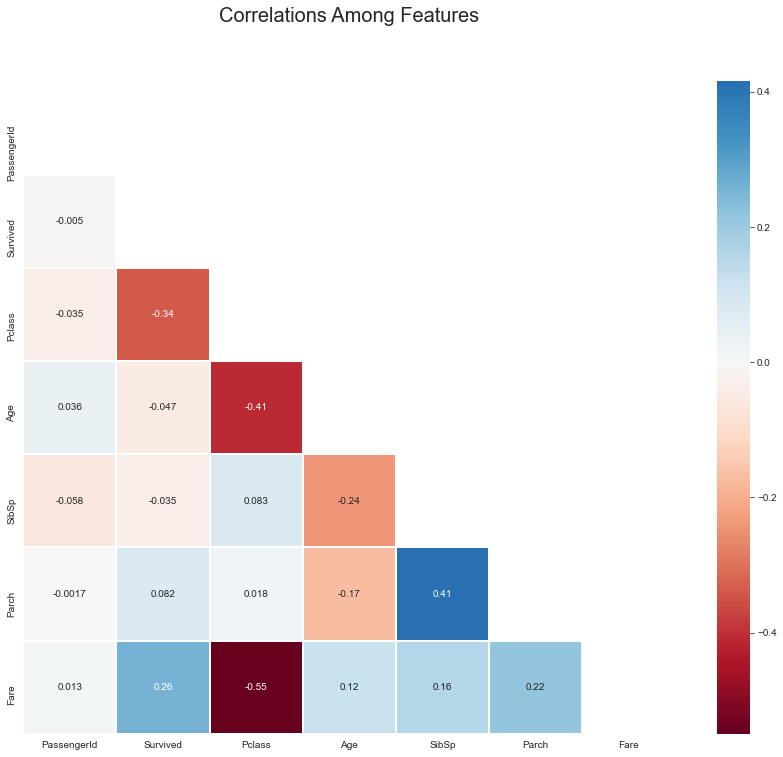

In [160]:
import numpy as np
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu',
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

#### Positive Correlation Features:

###### Fare and Survived: 0.26

#### Negative Correlation Features:


##### Fare and Pclass: -0.6
##### Sex and Survived: -0.55
##### Pclass and Survived: -0.33

### Statistical Test for Correlation

Our general assumption: “First-class people had a higher survival rate than third-class people”

#### Null Hypothesis: The socio-economic class of the people didn’t have an effect on the survival rate.

#### Alternative Hypothesis: The socio-economic class of the people affected their survival rate.

In [161]:
First_Class_Sample = np.array([np.mean(df[df["Pclass"]==1].sample(20)["Survived"].values) for i in range(100)])
third_Class_Sample = np.array([np.mean(df[df["Pclass"]==3].sample(20)["Survived"].values) for i in range(100)])

C:\Users\Abhinav Bagwari\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abhinav Bagwari\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


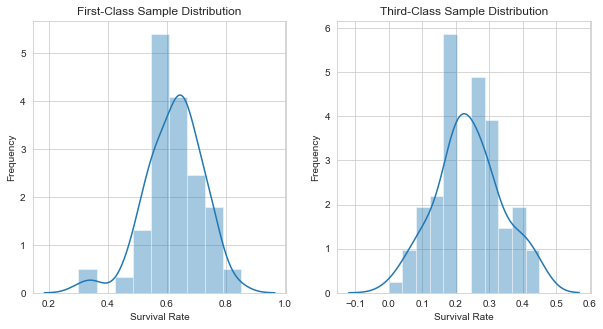

In [162]:
plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(First_Class_Sample)
plt.title("First-Class Sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
sns.distplot(third_Class_Sample)
plt.title("Third-Class Sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.show()

According to the sample distributions, the effect of the class is 0.6105 – 0.235.

Z-score is a measurement that describes how unlikely it is that the effect was taken from the normal distribution of the population. If we assume that the Null hypothesis is true (assume that the class has no effect on the survival rate) then the difference of the distribution of the two populations (the real populations not the sample)should have a mean of zero. The z-score of the observed effect will then describe how many standard deviations that effect is from the zero. If it’s too large, then it’s unlikely that this effect was taken from that distribution.

In [163]:
effect = np.mean(First_Class_Sample) - np.mean(third_Class_Sample)
sigma_first = np.std(First_Class_Sample)
sigma_third = np.std(third_Class_Sample)
sigma_difference = np.sqrt((sigma_first**2)/len(First_Class_Sample)  +  (sigma_third**2)/len(third_Class_Sample))
z_score = effect / sigma_difference
z_score

27.707467968721613

### Conclusion

The conclusion is that the provided sample proves a significant correlation between the socioeconomic class and the survival rate.By looking into the outputed value we can conclude that richer people had a better chance of survival at the ship.

## Building Machine Learning Model

In [164]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [165]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
df = pd.concat([df,sex,embark],axis=1)

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=101)

### Stochastic Gradient Descent (SGD):

In [171]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

### Random Forest:

In [172]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

### Logistic Regression:

In [173]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

C:\Users\Abhinav Bagwari\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### K Nearest Neighbor:

In [176]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

### Gaussian Naive Bayes:

In [177]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

### Perceptron:

In [178]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)

C:\Users\Abhinav Bagwari\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


### Linear Support Vector Machine:

In [179]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

C:\Users\Abhinav Bagwari\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Decision Tree:

In [181]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [182]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
80.90,Logistic Regression
80.58,Support Vector Machines
80.26,KNN
80.26,Naive Bayes
40.29,Perceptron
36.12,Stochastic Gradient Decent


### Confusion Matrix:

In [184]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[346,  49],
       [ 67, 161]], dtype=int64)

### Precision and Recall:

In [185]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7666666666666667
Recall: 0.706140350877193


Our model predicts 76% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 70 % of the people who actually survived

### F-Score:

In [187]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.7351598173515982

### ROC AUC Curve:

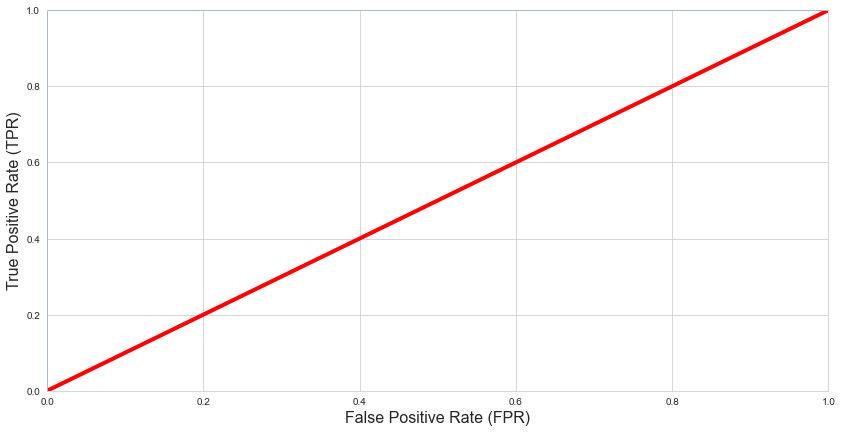

In [190]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

### ROC AUC Score

In [191]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9999999999999999
